Simular un problema de bandido multibrazo para dejar bien claros los conceptos del
problema. Para ello, debemos definir el número de muestras a tomar y el número de
acciones o brazos disponibles. Para el número de muestras, ten en cuenta que puede
representar una cantidad exhaustiva de experimentos realizados en cada palanca de
nuestra máquina tragamonedas. Al final de este fragmento de código generaremos el
conjunto de valores correspondientes a q , para cada una de las 10 acciones que q*(a)
hemos definido. Si te fijas bien, en este caso estamos suponiendo que los valores de
las acciones estarán dados por una variable aleatoria con distribución normal estándar,
es decir, con media igual a cero y desviación estándar igual a uno. Recuerda que los
valores q son los “reales” o “deseados” que aspiramos a estimar correctamente q*(a) utilizando una metodología apropiada.

In [5]:
# Dependencias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Ajustamos algunos parámetros para la visualización
sns.set_context("notebook", font_scale = 1.5,
                rc={"lines.linewidth":1.5})
%matplotlib inline

In [8]:
np.random.seed(432)

In [9]:
# Se generan el núemro de muestras y el número de acciones
num_muestras = 1000
num_acciones = 10

In [11]:
# Valores deseados de las acciones, es decir, q

valor_accion_deseada = np.random.normal(0,1, num_acciones)
valor_accion_deseada

array([ 0.18687723,  0.03449732, -0.38475438,  0.46459018,  0.6008925 ,
       -1.73585139, -0.3120086 ,  0.30777657, -0.2260744 , -0.07305409])

Simular la distribución de probabilidad que tendrá cada brazo para así generar la
variación de las recompensas para cada acción que deseemos realizar. Para este caso,
también usaremos la distribución normal con valores de media y desviación estándar
diferentes a cero y uno, respectivamente. En las primeras tres líneas definimos estos
valores para las medias y “los anchos”, recuerda que la desviación estándar está
relacionada con el ancho de la forma acampanada de la distribución normal o
gaussiana. Para las medias, empleamos el valor absoluto de los valores esperados de
las acciones y para los anchos usamos una variable aleatoria con distribución uniforme
entre 0.0 y 1.0. Luego, en la segunda parte del código simulamos estas distribuciones
para cada una de las muestras que elegimos tomar. Si te fijas detenidamente, estamos
guardando en un diccionario una secuencia de números aleatorios, que siguen la
distribución normal que indicamos antes, por cada acción o brazo. Luego, este
diccionario lo convertimos en un DataFrame, que viene a ser la manera más común de
tener la información de la Ciencia de Datos. Si no recuerdas qué es un DataFrame,
imagina que es una estructura de datos similar a una tabla de Excel, pero con algunas
herramientas y propiedades adicionales.

In [15]:
# Se usan los valores de las acciones como medias
datos_medias = np.abs(valor_accion_deseada)
datos_anchos = np.random.uniform(0.0, 1.0, num_acciones)
datos_anchos

array([0.02030052, 0.63465865, 0.9279022 , 0.88884168, 0.70394648,
       0.20400131, 0.83652811, 0.77435923, 0.91949173, 0.56923432])

In [16]:
# simulamos las muestras para las distribuciones de cada acción
datos_acciones = {}
for i in range(num_acciones):
    datos_acciones[f'{i+1}'] = np.random.normal(datos_medias[i], datos_anchos[i], num_muestras)

In [18]:
# se convierte este diccionario en un dataframe
df = pd.DataFrame(datos_acciones)
df

,1,2,3,4,5,6,7,8,9,10
0,0.174245,0.091638,0.974670,-0.348517,0.282275,2.078825,0.303606,0.094508,-0.053887,0.407693
1,0.198118,-0.104200,0.391165,1.082742,0.815465,1.833538,0.975432,1.181814,0.502890,-0.075976
2,0.194435,-0.566685,0.880853,0.356609,1.112146,1.883000,0.392738,0.475531,-1.698578,0.202721
3,0.204227,0.122807,-0.381634,-0.288014,0.129016,1.718853,-0.297777,-0.274816,-0.371141,-0.009628
4,0.168216,-0.973127,-0.960223,0.412408,0.732853,1.971327,-0.276961,0.953975,-1.018109,0.096063
...,...,...,...,...,...,...,...,...,...,...
995,0.207572,0.059871,1.795426,-0.056277,0.625484,1.596446,1.376171,0.155519,2.210462,1.099719
996,0.199180,0.634512,0.887011,-0.774534,-0.173042,1.649743,0.294732,0.937435,1.575308,1.072936
997,0.194190,0.598540,-0.299887,1.616595,1.913136,1.651704,-0.352195,-0.029871,0.693248,-0.358438
998,0.187773,-1.142588,-0.496888,0.490320,-0.240196,1.515953,0.980410,-0.963111,-0.202474,0.599184


#### Cara uno de los valores mostrados previamente son valores simulados de las recompensas que hemos obtenido por cada muestra de acuerdo al timpo de acción elegida. Se puede pensar que son valores que multiplican nuestra inversión inicial. Por ejemplo, si para cada muestra sumamos 10 pesos en la primera vez que usemos la palanca 2, se tendrá una recompensa de $0.091, pero si en lugar de activar la palanca 2 activamos la palanca 10, la ganancia o premio será de 0.4, y la ganancia será de $10.4

In [19]:
# paso 5 describe()
df.describe()

,1,2,3,4,5,6,7,8,9,10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.187910,0.030021,0.378405,0.495979,0.588970,1.728376,0.341151,0.326664,0.236946,0.078559
std,0.020086,0.636665,0.914500,0.874012,0.675345,0.200658,0.833573,0.776917,0.929066,0.576067
min,0.116162,-1.943804,-2.237476,-2.012222,-1.263338,1.146004,-2.199565,-2.251116,-2.800447,-1.574456
25%,0.174725,-0.416041,-0.269085,-0.098866,0.112201,1.584786,-0.207250,-0.208043,-0.404811,-0.320151
50%,0.187667,0.057641,0.400137,0.477996,0.582463,1.718696,0.366153,0.290354,0.265635,0.074064
75%,0.200846,0.464155,1.016270,1.097005,1.051102,1.860807,0.903793,0.851339,0.886080,0.452347
max,0.251523,1.983292,2.999886,3.053413,2.538799,2.390334,3.177264,2.485047,2.933865,2.156191


In [20]:
print(f'Valores de la media: {datos_medias}')
print(f'Valores de la dv: {datos_anchos}')

Valores de la media: [0.18687723 0.03449732 0.38475438 0.46459018 0.6008925  1.73585139
 0.3120086  0.30777657 0.2260744  0.07305409]
Valores de la dv: [0.02030052 0.63465865 0.9279022  0.88884168 0.70394648 0.20400131
 0.83652811 0.77435923 0.91949173 0.56923432]


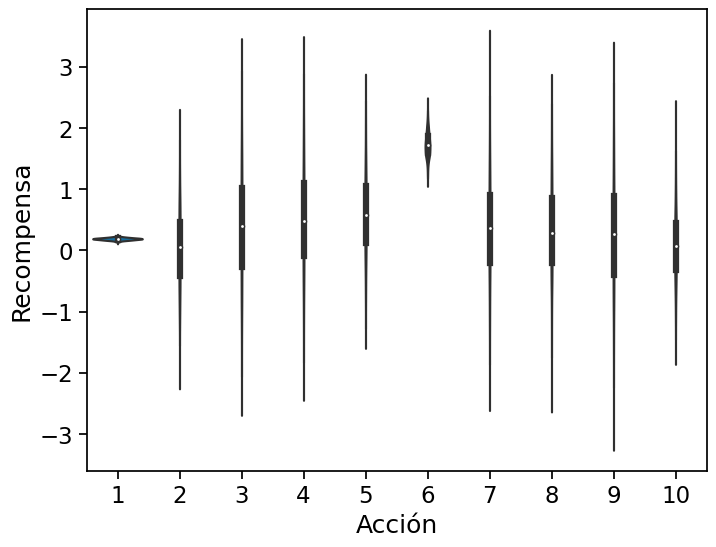

In [21]:
# Identifiquemos las mejores acciones

# Graficamos los datos de las simulaciones
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, palette='colorblind')
plt.ylabel(r"Recompensa")
plt.xlabel(r"Acción")
plt.show()

Observemos los resultados, en la gráfica que se genera después de ejecutar este
bloque de código. Tal como te puedes dar cuenta, estamos utilizando una
representación de “violines”, o violinplot, que nos permite observar rápidamente la
distribución de las muestras. Para que te hagas una mejor idea de esto, cualquiera de
los lados de los violines corresponde a la gráfica de la frecuencia de los valores; es
decir, una curva dada por un histograma. Por dentro de cada violín, observamos un
pequeño recuadro de color negro que nos indicará el rango intercuartílico o IQR, que
corresponde al 50% de los datos graficados; o sea, desde el primer cuartil al tercer
cuartil. En el medio, dentro del recuadro de color negro, vemos la mediana o el segundo
cuartil representado con un punto blanco. Si te fijas, esta gráfica es básicamente la
versión ilustrada de la tabla de estadísticas que generamos hace unos momentos, pero
con la diferencia de que podemos identificar mucho más fácilmente las tendencias y
comportamientos de los datos. Ten en cuenta que dependiendo de la biblioteca que
uses y configuración inicial, los violines pueden variar ligeramente su representación.
Por ejemplo, podemos incluir el valor de la media y la desviación estándar activando
algunos parámetros en la función, pero por lo pronto trabajemos con la visualización
por defecto. Te invito a que investigues un poco más sobre este tipo de gráficas tan
interesantes.


Ahora viene la pregunta del millón: ¿Qué acción elegirías para maximizar tu ganancia,
en términos de recompensas, utilizando la información que hemos obtenido hasta el
momento? ¡Exacto!, es la acción 8 debido a su valor medio y menor rango de variación
representado con el tamaño de su cuerpo en el eje vertical. Por ejemplo, la acción 4
podría parecer una buena opción si solo miramos su mediana y la comparamos con la
de la acción 6. Sin embargo, su rango intercuartílico es significativamente mayor al de
la acción 6. ¿Qué quiere decir esto? Bueno, que si bien puede haber muestras o jugadas
en las que puedes obtener un valor de recompensa cercano a 4, puedes llegar a tener
valores de casi -3. Por su parte, en la acción 6, vemos que esta variación va desde
aproximadamente -1 hasta 2. Si te fijas bien, a mayor riesgo, mayor será la ganancia.
Pero tú y yo sabemos que esto no siempre resulta bien. Algunas veces puede ser una
opción factible, pero, por lo general, preferimos opciones más seguras como, por
ejemplo, las acciones 7 y 9.

Conclusión.
Podemos concluir la descripción del problema del bandido con múltiples brazos
mencionando que el problema de elegir bien una secuencia de acciones a tomar, para
lograr la máxima ganancia neta, está estrechamente relacionado con el problema
mismo de balancear entre usar una estrategia de exploración o una de explotación.
¿Cómo crees que podemos llegar a implementar una metodología que satisfaga esta
condición?